In [104]:
using OptimalControl    #
using MINPACK           # NLE solver

In [105]:
# Problem definition
t0 = 0
tf = 1
x0 = -1
xf = 0
α  = 1.5
@def ocp begin
    t ∈ [ t0, tf ], time
    x ∈ R, state
    u ∈ R, control
    x(t0) == x0
    x(tf) == xf
    ẋ(t) == -x(t) + α * x(t)^2 + u(t)
    ∫( 0.5u(t)^2 ) → min
end;

In [106]:
# Flow definition 
u(x, p) = p
f = Flow(ocp, u)
exp(p0; saveat=[]) = f((t0, tf), x0, p0, saveat=saveat).ode_sol;

In [107]:
# Shooting method
S(p0) = exp(p0)(tf)[1] - xf;    # shooting function

nle = (s, ξ) -> s[1] = S(ξ[1])  # auxiliary function
ξ = [ 0.0 ]  # initial guess
indirect_sol = fsolve(nle, ξ)

# we retrieve the costate solution
p0_sol = indirect_sol.x[1]
println("costate:    p0 = ", p0_sol)
println("shoot: |S(p0)| = ", abs(S(p0_sol)), "\n")

costate:    p0 = 0.07202997482167581
shoot: |S(p0)| = 1.1167321291595698e-15



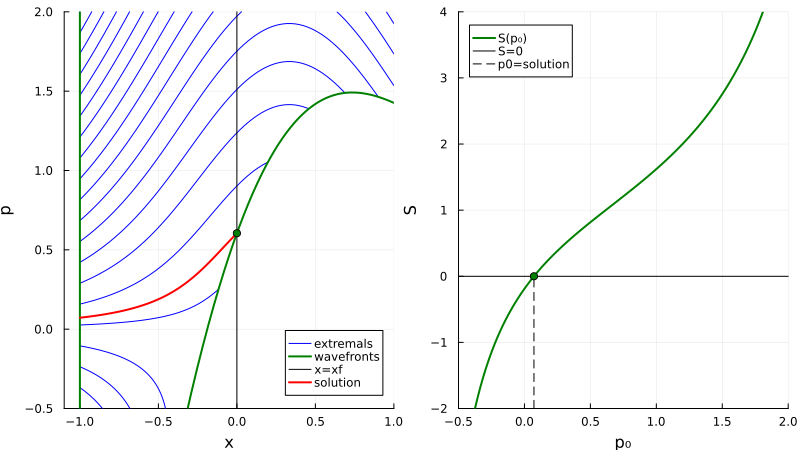

In [146]:
# Plottings

# parameters
times = range(t0, tf, length=2)
p0min = -0.5
p0max = 2

# plot of the flow
plt_flow = plot()

p0s = range(p0min, p0max, length=20)
for i ∈ 1:length(p0s) # plot some trajectories
    sol = exp(p0s[i])
    x = [sol(t)[1] for t ∈ sol.t]
    p = [sol(t)[2] for t ∈ sol.t]
    label = i==1 ? "extremals" : false
    plot!(plt_flow, x, p, color=:blue, label=label)
end

p0s = range(p0min, p0max, length=200)
xs  = zeros(length(p0s), length(times))
ps  = zeros(length(p0s), length(times))
for i ∈ 1:length(p0s)
    sol = exp(p0s[i], saveat=times)
    xs[i, :] = [z[1] for z ∈ sol.(times)]
    ps[i, :] = [z[2] for z ∈ sol.(times)]
end
for j ∈ 1:length(times) # plot intermediate points
    label = j==1 ? "wavefronts" : false
    plot!(plt_flow, xs[:, j], ps[:, j], color=:green, linewidth=2, label=label)
end

plot!(plt_flow, xlims = (-1.1, 1), ylims =  (p0min, p0max))
plot!(plt_flow, [0, 0], [p0min, p0max], color=:black, xlabel="x", ylabel="p", label="x=xf")

# solution
sol = exp(p0_sol)
x = [sol(t)[1] for t ∈ sol.t]
p = [sol(t)[2] for t ∈ sol.t]
plot!(plt_flow, x, p, color=:red, linewidth=2, label="solution")
plot!(plt_flow, [x[end]], [p[end]], seriestype=:scatter, color=:green, label=false)   # solution

# plot of the shooting function
plt_shoot = plot(xlims=(p0min, p0max), ylims=(-2, 4), xlabel="p₀", ylabel="S")
plot!(plt_shoot, p0s, S, linewidth=2, label="S(p₀)", color=:green)
plot!(plt_shoot, [p0min, p0max], [0, 0], color=:black, label="S=0")
plot!(plt_shoot, [p0_sol, p0_sol], [-2, 0], color=:black, label="p0=solution", linestyle=:dash)
plot!(plt_shoot, [p0_sol], [0], seriestype=:scatter, color=:green, label=false)   # solution

# plots
plot(plt_flow, plt_shoot, layout=(1,2), size=(800, 450))